# Stock Price Prdiction using Machine Learning

In [4]:
''' Stock market prediction is the act of trying to determine the future value of company stock or 
other financial instruments traded on an exchange.


The successful prediction of a stock’s future price could yield a significant profit. In this application, 
we used the LSTM network to predict the closing stock price using the past 60-day stock price.

For the application, we used the machine learning technique called Long Short Term Memory (LSTM). 
LSTM is an artificial recurrent neural network (RNN) architecture used in the field of deep learning.'''

' Stock market prediction is the act of trying to determine the future value of company stock or \nother financial instruments traded on an exchange.\n\n\nThe successful prediction of a stock’s future price could yield a significant profit. In this application, \nwe used the LSTM network to predict the closing stock price using the past 60-day stock price.\n\nFor the application, we used the machine learning technique called Long Short Term Memory (LSTM). \nLSTM is an artificial recurrent neural network (RNN) architecture used in the field of deep learning.'

# Step 1 Import Library

In [5]:
# Step 1 Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import bar_chart_race as bcr
import math
from sklearn.preprocessing import MinMaxScaler


'''Keras is a deep learning API written in Python, running on top of the machine learning platform 
TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea
to result as fast as possible is key to doing good research.'''


'Keras is a deep learning API written in Python, running on top of the machine learning platform \nTensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea\nto result as fast as possible is key to doing good research.'

Step  2 Loading and Prepartion data

In [6]:
# #Step  2 Loading and Prepartion data
#from google.colab import files
data=pd.read_csv(r"C:/Users/Admin/Desktop/StockPricePrediction/all_stocks_5yr.csv")

#files.upload()

# Dataset

This dataset(all_stocks_5yr.csv)  is downloaded from Kaggle website it contains 444 different stocks .It has 5 years details of every stock and date,open,high,low,close,volume,Name contains these columns.
For Better result prediction we can separate a specific stock and can make a new csv file .


In [7]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [8]:
#data=pd.read_csv("C:/Users/Admin/Desktop/dataset/all_stocks_5yr.csv")
data.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [9]:
data.info

<bound method DataFrame.info of               date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]>

In [10]:
'''This data has Seven column date,open,high,low,close,volume,Name'''

'This data has Seven column date,open,high,low,close,volume,Name'

# Step 3 Understanding data

In [11]:
# Step 3 Understandig data

'''From the whole dataset, we will first extract all the unique stock ticks name with the help of unique function. 
   In the dataset, we have 444 different stock names.'''

all_stock_tick_names = data['Name'].unique()
print(all_stock_tick_names)

['AAL' 'AAPL' 'AAP' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADSK' 'ADS' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIV' 'AIZ' 'AJG'
 'AKAM' 'ALB' 'ALGN' 'ALK' 'ALLE' 'ALL' 'ALXN' 'AMAT' 'AMD' 'AME' 'AMGN'
 'AMG' 'AMP' 'AMT' 'AMZN' 'ANDV' 'ANSS' 'ANTM' 'AON' 'AOS' 'APA' 'APC'
 'APD' 'APH' 'APTV' 'ARE' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AVY' 'AWK' 'AXP'
 'AYI' 'AZO' 'A' 'BAC' 'BAX' 'BA' 'BBT' 'BBY' 'BDX' 'BEN' 'BF.B' 'BHF'
 'BHGE' 'BIIB' 'BK' 'BLK' 'BLL' 'BMY' 'BRK.B' 'BSX' 'BWA' 'BXP' 'CAG'
 'CAH' 'CAT' 'CA' 'CBG' 'CBOE' 'CBS' 'CB' 'CCI' 'CCL' 'CDNS' 'CELG' 'CERN'
 'CFG' 'CF' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CINF' 'CI' 'CLX' 'CL' 'CMA' 'CMCSA'
 'CME' 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COL' 'COO' 'COP' 'COST'
 'COTY' 'CPB' 'CRM' 'CSCO' 'CSRA' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS'
 'CVX' 'CXO' 'C' 'DAL' 'DE' 'DFS' 'DGX' 'DG' 'DHI' 'DHR' 'DISCA' 'DISCK'
 'DISH' 'DIS' 'DLR' 'DLTR' 'DOV' 'DPS' 'DRE' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN'
 'DWDP' 'DXC' 'D' 'EA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'E

In [12]:
# Extracting Data for a specific stock name

# 1. Getting a stock name
stock_name = input("Enter a Stock Price Name: ")
 
# 2. Extrating all the data having the name same as the stock name entered
all_data = data['Name'] == stock_name
 
# 3. Putting all the rows of specific stock in a variable
final_data = data[all_data]
 
# 4. Printing first 5 rows of the stock data of a specific stock name
final_data.head()

Enter a Stock Price Name: FITB


,date,open,high,low,close,volume,Name
227422,2013-02-08,16.55,16.61,16.40,16.61,9814015,FITB
227423,2013-02-11,16.44,16.52,16.38,16.50,12187679,FITB
227424,2013-02-12,16.54,16.63,16.45,16.56,8284724,FITB
227425,2013-02-13,16.53,16.55,16.05,16.11,16635670,FITB
227426,2013-02-14,16.09,16.19,16.04,16.13,11091204,FITB


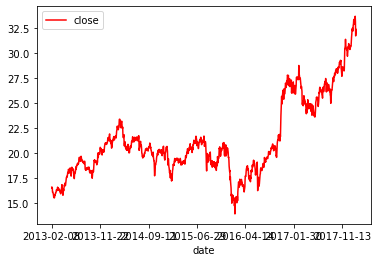

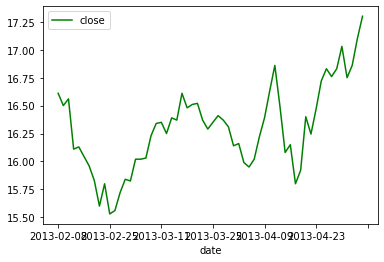

<Figure size 2160x2160 with 0 Axes>

In [13]:
# Visualizing the stock data

#  Plotting date vs the close market stock price
final_data.plot('date','close',color="red")
 
# Extract only top 60 rows to make the plot a little clearer
new_data = final_data.head(60)
 
#  Plotting date vs the close  market stock price
new_data.plot('date','close',color="green")
plt.figure(figsize=(30, 30))
 
plt.show()

# Step 4 Creating a new Dataframe and Training data

In [11]:
#  Step 4 Creating a new Dataframe and Training data

# 1. Filter out the closing market price data
close_data = final_data.filter(['close'])
 
# 2. Convert the data into array for easy evaluation
dataset = close_data.values
 
# 3. Scale/Normalize the data to make all values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
 
# 4. Creating training data size : 70% of the data
training_data_len = math.ceil(len(dataset) *.7)
train_data = scaled_data[0:training_data_len  , : ]
 
# 5. Separating the data into x and y data
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])
 
    # 6. Converting the training x and y values to numpy arrays
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)
 
    # 7. Reshaping training s and y data to make the calculations easier
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))


In [12]:
'''Here we create a data set to train the data that contains the closing price of 60 days ( 60 data points) 
so that we could do the prediction for the 61st closing price.Now the x_train data set will contain a total of 60 values, 
the first column will contain from the index of 0 to 59 and the second column from the index of 1 to 60, and so on

The y_train data set will contain the 61st value at its first column located at index 60 and for the second column, 
it will contain the 62nd value located at index 61 and so on.

Converting both the independent and dependent train data set as x_train_data and y_train_data respectively, 
into the NumPy arrays so that they can be used to train the LSTM model.

Also, as the LSTM model is expecting the data in 3-dimensional data set, using reshape() function 
we will reshape the data in the form of 3-dimension.'''

'Here we create a data set to train the data that contains the closing price of 60 days ( 60 data points) \nso that we could do the prediction for the 61st closing price.Now the x_train data set will contain a total of 60 values, \nthe first column will contain from the index of 0 to 59 and the second column from the index of 1 to 60, and so on\n\nThe y_train data set will contain the 61st value at its first column located at index 60 and for the second column, \nit will contain the 62nd value located at index 61 and so on.\n\nConverting both the independent and dependent train data set as x_train_data and y_train_data respectively, \ninto the NumPy arrays so that they can be used to train the LSTM model.\n\nAlso, as the LSTM model is expecting the data in 3-dimensional data set, using reshape() function \nwe will reshape the data in the form of 3-dimension.'

# Step 5 Building LSTM Model

In [13]:
# Step 5 Building LSTM Model

model = Sequential()  #is a way of creating deep learning models where an instance of the Sequential class is created and model layers are created and added to it
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

#  Step 6 Compiling the Model

In [14]:
#  Step 6 Compiling the Model

model.compile(optimizer='adam', loss='mean_squared_error')

'''Adam is an optimization solver for the Neural Network algorithm that is computationally efficient,
requires little memory, and is well suited for problems that are large in terms of data or parameters
or both.'''

model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=1)

822/822 [==============================] - 21s 22ms/step - loss: 0.0013


#  Step 7 Testing the model on testing data

In [15]:
#  Step 7 Testing the model on testing data

# 1. Creating a dataset for testing
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
 
# 2.  Convert the values into arrays for easier computation
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
 
# 3. Making predictions on the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [16]:
print(predictions)

[[19.139002]
 [19.17474 ]
 [19.189852]
 [19.171158]
 [19.188389]
 [19.214096]
 [19.256365]
 [19.30905 ]
 [19.359962]
 [19.40618 ]
 [19.427176]
 [19.421068]
 [19.422752]
 [19.442589]
 [19.48638 ]
 [19.58836 ]
 [19.703598]
 [19.789118]
 [19.854767]
 [19.863796]
 [19.864737]
 [19.878326]
 [19.863182]
 [19.878265]
 [19.906889]
 [19.960638]
 [20.04435 ]
 [20.117418]
 [20.199488]
 [20.27381 ]
 [20.347141]
 [20.416555]
 [20.490475]
 [20.482504]
 [20.474163]
 [20.43726 ]
 [20.345018]
 [20.273125]
 [20.20522 ]
 [20.169048]
 [20.196585]
 [20.252613]
 [20.307587]
 [20.352491]
 [20.3407  ]
 [20.299377]
 [20.152657]
 [19.986013]
 [19.801895]
 [19.683033]
 [19.715551]
 [19.897758]
 [20.158985]
 [20.436615]
 [20.674503]
 [20.914494]
 [21.138296]
 [21.282314]
 [21.383598]
 [21.457024]
 [21.46443 ]
 [21.40295 ]
 [21.28092 ]
 [21.25429 ]
 [21.237684]
 [21.434488]
 [21.831705]
 [22.38481 ]
 [23.057615]
 [23.744658]
 [24.193104]
 [24.530718]
 [24.786304]
 [24.975899]
 [25.13936 ]
 [25.27764 ]
 [25.34649 ]

In [17]:
print(y_test)

[[19.09 ]
 [19.24 ]
 [19.11 ]
 [19.45 ]
 [19.41 ]
 [19.52 ]
 [19.58 ]
 [19.59 ]
 [19.62 ]
 [19.52 ]
 [19.45 ]
 [19.59 ]
 [19.69 ]
 [19.81 ]
 [20.16 ]
 [20.16 ]
 [20.04 ]
 [20.1  ]
 [19.87 ]
 [20.02 ]
 [20.14 ]
 [19.93 ]
 [20.21 ]
 [20.22 ]
 [20.37 ]
 [20.54 ]
 [20.46 ]
 [20.63 ]
 [20.64 ]
 [20.74 ]
 [20.8  ]
 [20.92 ]
 [20.46 ]
 [20.72 ]
 [20.54 ]
 [20.24 ]
 [20.46 ]
 [20.35 ]
 [20.47 ]
 [20.74 ]
 [20.74 ]
 [20.69 ]
 [20.68 ]
 [20.39 ]
 [20.37 ]
 [19.74 ]
 [19.8  ]
 [19.58 ]
 [19.87 ]
 [20.52 ]
 [21.02 ]
 [21.21 ]
 [21.31 ]
 [21.28 ]
 [21.67 ]
 [21.82 ]
 [21.61 ]
 [21.76 ]
 [21.85 ]
 [21.62 ]
 [21.42 ]
 [21.21 ]
 [21.9  ]
 [21.65 ]
 [22.95 ]
 [23.74 ]
 [24.47 ]
 [25.27 ]
 [25.67 ]
 [24.9  ]
 [25.43 ]
 [25.68 ]
 [25.85 ]
 [26.14 ]
 [26.29 ]
 [26.14 ]
 [25.38 ]
 [25.39 ]
 [26.02 ]
 [26.44 ]
 [25.89 ]
 [26.09 ]
 [26.32 ]
 [26.55 ]
 [26.98 ]
 [26.89 ]
 [26.54 ]
 [26.76 ]
 [26.91 ]
 [27.2  ]
 [26.8  ]
 [27.23 ]
 [27.79 ]
 [27.69 ]
 [27.62 ]
 [27.68 ]
 [27.76 ]
 [27.26 ]
 [26.73 ]
 [26.97 ]


# Step 8  Error Calculation

In [18]:
# Step 8  Error Calculation

rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

1.2108638123731847


# Step 9 Make Predictions

<ipython-input-19-00606e9b1c02>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


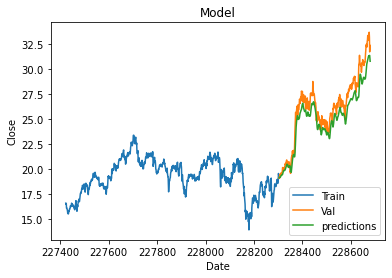

In [19]:
# Step 9 Make Predictions

train = final_data[:training_data_len]
valid = final_data[training_data_len:]
 
valid['predictions'] = predictions
 
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(train['close'])
plt.plot(valid[['close', 'predictions']])
 
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
 
plt.show()


In [20]:
'''In This graph orange color is showing for original value and Green color is showing for Predict value by LSTM model....
   So this graph is showing predict values is very close to test value  '''

'In This graph orange color is showing for original value and Green color is showing for Predict value by LSTM model....\n   So this graph is showing predict values is very close to test value  '

# The Actual vs Predicted Values

In [21]:
# Step 10 test value data and compare with prediction values

import tabulate
from tabulate import tabulate
#print(tabulate(y_test)),print(tabulate(predictions))
print(tabulate(y_test,predictions))
#print(tabulate(y_test,predictions))

  [19.542528]
-------------
       19.09
       19.24
       19.11
       19.45
       19.41
       19.52
       19.58
       19.59
       19.62
       19.52
       19.45
       19.59
       19.69
       19.81
       20.16
       20.16
       20.04
       20.1
       19.87
       20.02
       20.14
       19.93
       20.21
       20.22
       20.37
       20.54
       20.46
       20.63
       20.64
       20.74
       20.8
       20.92
       20.46
       20.72
       20.54
       20.24
       20.46
       20.35
       20.47
       20.74
       20.74
       20.69
       20.68
       20.39
       20.37
       19.74
       19.8
       19.58
       19.87
       20.52
       21.02
       21.21
       21.31
       21.28
       21.67
       21.82
       21.61
       21.76
       21.85
       21.62
       21.42
       21.21
       21.9
       21.65
       22.95
       23.74
       24.47
       25.27
       25.67
       24.9
       25.43
       25.68
       25.85
       26.14
       26.29
  